#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованием библиотек для обработки данных и машинного обучения, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Везде, где это требуется, должны быть отрисованы необходимые графики и даны комментарии и выводы.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [ ]:
import numpy as np

def task_1(arr):
    arr = list(arr)
    if len(arr) == 1:
      
        return arr[0] > 0
    a = arr[0]
    del arr[:1]
    return a > 0 and task_1(arr)

In [ ]:
#test
print(task_1(np.array([1.0,2.0,3])))

print(task_1([0.0,2.0,3]))

print(task_1([-1.0,2.0,3]))

print(task_1(np.array([111.5,22.0,33])))

print(task_1([2.0,-2.0,-3]))

True
False
False
True
False


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [ ]:
def task_2(arr, n):
    arr = list(arr)
    if len(arr) == 1:
        return arr * n
    a = arr[:1]
    del arr[:1]
    return a * n + task_2(arr, n)

In [ ]:
task_2([1,2,3],3)

[1, 1, 1, 2, 2, 2, 3, 3, 3]

In [ ]:
task_2(np.array([1,2,3,0]),2)

[1, 1, 2, 2, 3, 3, 0, 0]

In [ ]:
task_2(np.array([1,2,3,0]),0)

[]

In [ ]:
task_2(np.array([1,2,3,0]),1)

[1, 2, 3, 0]

__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [ ]:
def task_3(V, v):
    if len(v) == 1:
        return [sum(V[:v[0]])]
    elif len(v) > 1:
        v_start = v[:1]
        del v[:1]
        V_start = V[:v_start[0]]
        del V[:v_start[0]]
        return task_3(V_start, v_start) + task_3(V, v)

In [ ]:
task_3([3,4,5,6], [4])

[18]

In [ ]:
task_3([3,4,5,6], [2,2])

[7, 11]

In [ ]:
task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[2, 1, 3])

[3, 3, 15]

Для решения следующих заданий скачайте набор данных 20 News Group с помощью следующего кода:

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

X_train = fetch_20newsgroups(subset='train')
X_test = fetch_20newsgroups(subset='test')

label_names = pd.DataFrame(columns=['label_name', 'label_id'],
                           data=[(i, e) for i, e in enumerate(list(X_train.target_names))])
data = pd.DataFrame()
data['text'] = X_train.data + X_test.data
data['is_train'] = [True] * len(X_train.data) + [False] * len(X_test.data)
data['label_id'] = list(X_train.target) + list(X_test.target)

__Задание 4 (1.5 балла):__ Используя возможности библиотеки pandas

- сделайте join таблиц `data` и `label_names`, удалив из итоговой таблицы поле `label_id`
- посчитайте количество обучающих и тестовых данных
- постройте круговую диаграмму, показывающую долю каждого класса в обучающих данных

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=94c4fa532ecaee4175c69712ff1f650bc18184c344105c504e0f2520f8be02f0
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
data1 = data 
data2 = label_names

In [ ]:
data1

,text,is_train,label_id
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,True,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True,14
...,...,...,...
18841,From: richmond@spiff.Princeton.EDU (Stupendous...,False,14
18842,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...,False,4
18843,From: hhenderson@vax.clarku.edu\nSubject: RE: ...,False,9
18844,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...,False,6


In [ ]:
data2

,label_name,label_id
0,0,alt.atheism
1,1,comp.graphics
2,2,comp.os.ms-windows.misc
3,3,comp.sys.ibm.pc.hardware
4,4,comp.sys.mac.hardware
5,5,comp.windows.x
6,6,misc.forsale
7,7,rec.autos
8,8,rec.motorcycles
9,9,rec.sport.baseball


In [ ]:
data1 = data1.set_index('label_id') 
data2 = data2.set_index('label_name') 
data1.head()

,text,is_train
label_id,,
7,From: lerxst@wam.umd.edu (where's my thing)\nS...,True
4,From: guykuo@carson.u.washington.edu (Guy Kuo)...,True
4,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,True
1,From: jgreen@amber (Joe Green)\nSubject: Re: W...,True
14,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,True


In [ ]:
#join
data = data1.join(data2)
data.reset_index(drop=True, inplace=True)
data = data.rename(columns={"label_id": "label_name"})
data

,text,is_train,label_name
0,From: mathew <mathew@mantis.co.uk>\nSubject: R...,True,alt.atheism
1,From: keith@cco.caltech.edu (Keith Allan Schne...,True,alt.atheism
2,From: a137490@lehtori.cc.tut.fi (Aario Sami)\n...,True,alt.atheism
3,From: chrisb@seachg.com (Chris Blask)\nSubject...,True,alt.atheism
4,From: (Rashid)\nSubject: Re: Yet more Rushdie...,True,alt.atheism
...,...,...,...
18841,Subject: Re: [rw] Is Robert Weiss the only ort...,False,talk.religion.misc
18842,From: daveb@pogo.wv.tek.com (Dave Butler)\nSub...,False,talk.religion.misc
18843,From: pharvey@quack.kfu.com (Paul Harvey)\nSub...,False,talk.religion.misc
18844,Nntp-Posting-Host: gjalp.ifi.uio.no\nFrom: joa...,False,talk.religion.misc


In [ ]:
print('Размер обучающей выборки =', data[data['is_train']].shape[0])
print('Размер тестовой выборки =', data[data['is_train'] == False].shape[0])

Размер обучающей выборки = 11314
Размер тестовой выборки = 7532


In [ ]:
info_diag = data[data['is_train']]['label_name'].value_counts() 
info_diag

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: label_name, dtype: int64

In [ ]:
labels = info_diag.index.tolist()
vals = info_diag.tolist()

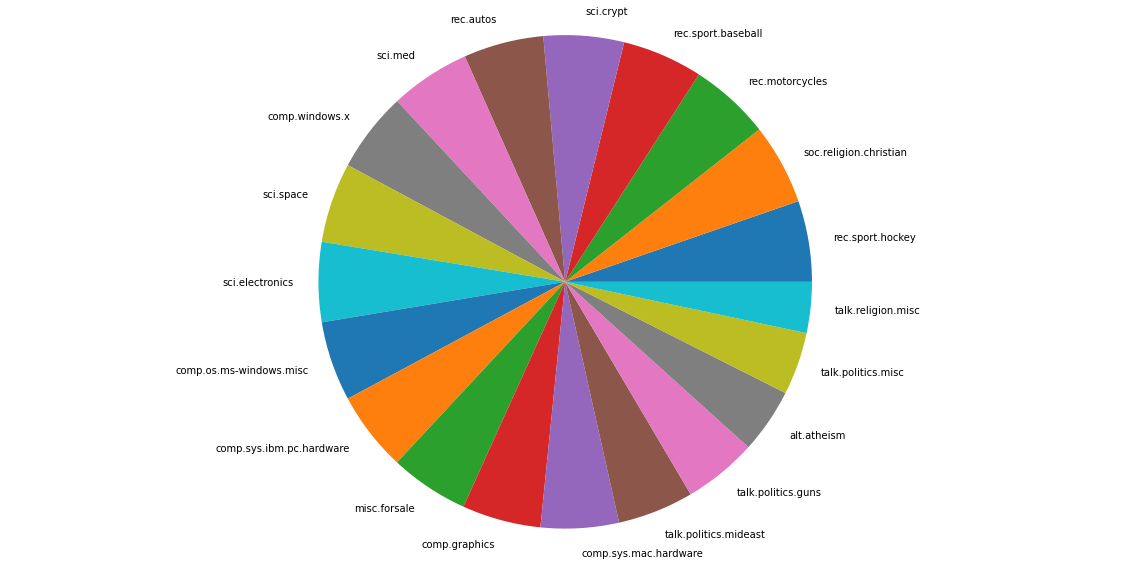

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [20, 10]

fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")
plt.show()

__Задание 5 (1.5 балла):__ Каждый объект представляет собой текст. Чаще всего тексты предобрабатывают перед тем, как пытаться выделять из них признаки. Опишите функцию `preprocess`, которая получает на вход сырой текст и возвращает предобработанный. Примените эту функцию к элементу `text` каждого объекта и результат запишите в столбец `pp_text` (далее под текстом подразумевается именно содержимое этого столбца). За пределами `preprocess` циклами пользоваться запрещено (т.е. предобработка должна применяться средствами DataFrame). Функция должна выполнять следующий набор операций:

- привести текст к нижнему регистру
- заменить все символы '\n', '\t' и '\r' на пробелы
- заменить в тексте все символы, не являющиеся английскими буквами, на пробелы
- сделать split текста по пробелам, удалив все пустые слова
- вернуть получившийся список слов

Для ускорения `preprocess` может использовать внешние переменные, например, скомпилированные регулярные выражения.

In [ ]:
import re
eng_letters = re.compile('[^a-zA-Z ]')

def preprocess(text): 
    text = text.lower()
    text = text.replace('\n',' ')
    text = text.replace('\t',' ')
    text = text.replace('\r',' ')
    text = eng_letters.sub(' ', text)
    list_of_words = re.split(' ', text)
    list_of_words[:] = (word for word in list_of_words if word != '')
    return list_of_words

def task_5(df):
    df['pp_text'] = df['text'].apply(lambda x: preprocess(x))

In [ ]:
text = ' Qw#erty\nQwe6rty2 0'

preprocess(text)

['qw', 'erty', 'qwe', 'rty']

In [ ]:
task_5(data) 
data

,text,is_train,label_name,pp_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: R...,True,alt.atheism,"[from, mathew, mathew, mantis, co, uk, subject..."
1,From: keith@cco.caltech.edu (Keith Allan Schne...,True,alt.atheism,"[from, keith, cco, caltech, edu, keith, allan,..."
2,From: a137490@lehtori.cc.tut.fi (Aario Sami)\n...,True,alt.atheism,"[from, a, lehtori, cc, tut, fi, aario, sami, s..."
3,From: chrisb@seachg.com (Chris Blask)\nSubject...,True,alt.atheism,"[from, chrisb, seachg, com, chris, blask, subj..."
4,From: (Rashid)\nSubject: Re: Yet more Rushdie...,True,alt.atheism,"[from, rashid, subject, re, yet, more, rushdie..."
...,...,...,...,...
18841,Subject: Re: [rw] Is Robert Weiss the only ort...,False,talk.religion.misc,"[subject, re, rw, is, robert, weiss, the, only..."
18842,From: daveb@pogo.wv.tek.com (Dave Butler)\nSub...,False,talk.religion.misc,"[from, daveb, pogo, wv, tek, com, dave, butler..."
18843,From: pharvey@quack.kfu.com (Paul Harvey)\nSub...,False,talk.religion.misc,"[from, pharvey, quack, kfu, com, paul, harvey,..."
18844,Nntp-Posting-Host: gjalp.ifi.uio.no\nFrom: joa...,False,talk.religion.misc,"[nntp, posting, host, gjalp, ifi, uio, no, fro..."


__Задание 6 (2 балла):__ Каждое уникальное слово текста представляет собой признак. Посчитайте, сколько в обучающих текстах есть уникальных слов, отобразите гистограмму частот встречаемости слов в обучающей коллекции, 
отсортировав слова по убыванию частоты встречаемости (по оси X идут все слова из словаря коллекции в порядке убывания частоты встречаемости, по оси Y указываются значения частот).

Для уменьшения признакового пространства словарь фильтруют. Удалите из словаря

- все слова, встречающиеся более 9000-х раз
- все слова, встречающиеся менее 3-х раз
- все слова длиной менее 3 символов
- все слова длиной более 20 символов
- все слова, состоящие из одного и того же символа

Профильтруйте обучающую коллекцию по новому словарю и снова посчитайте число уникальных слов в словаре и снова постройте гистограмму частот.

In [ ]:
from itertools import chain
hist = pd.DataFrame(list(chain.from_iterable(data["pp_text"].tolist())) ).value_counts()

In [ ]:
words = list(zip(*list(chain(hist.index.values))))[0] 
amount = hist.tolist()  


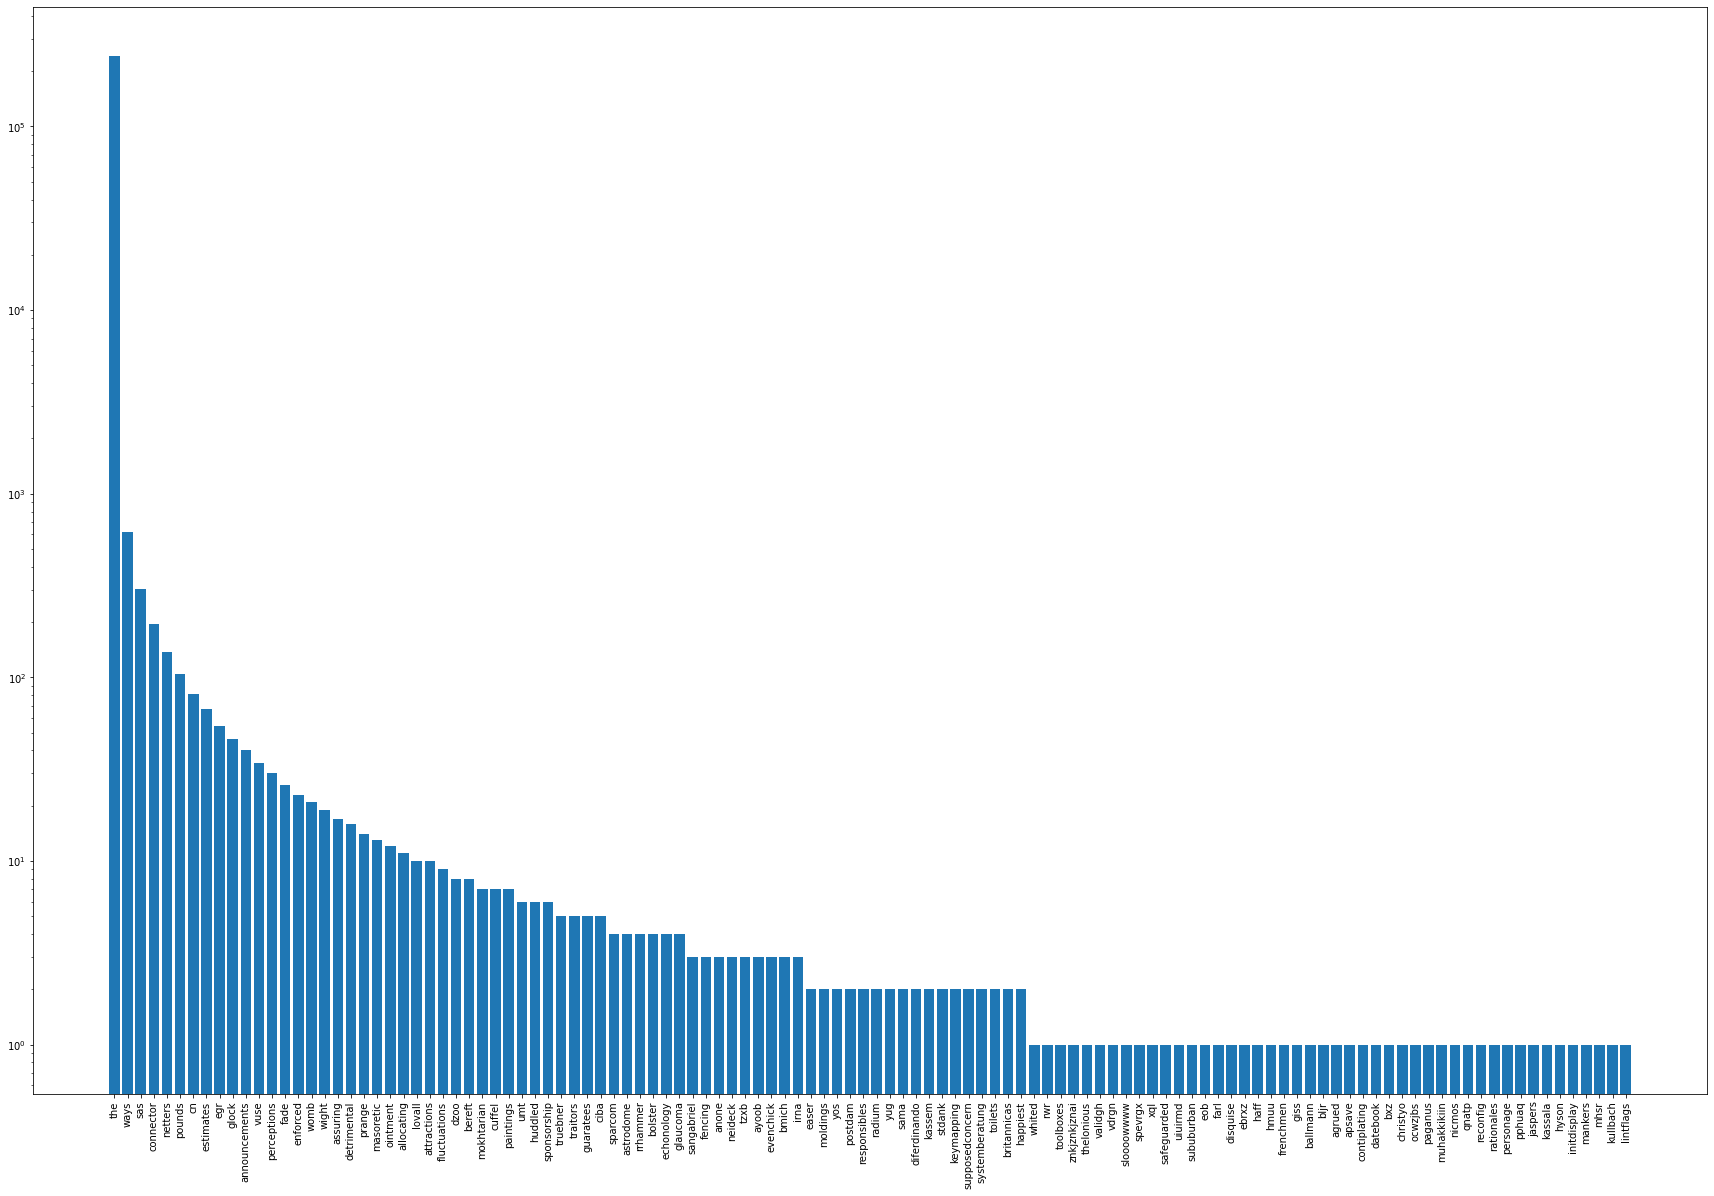

In [ ]:
import matplotlib.pyplot as plt
import matplotlib 

plt.figure(figsize=(30, 20))
plt.bar(words[::1000], amount[::1000])
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

In [ ]:
def filter(words, amount): 
  df = pd.DataFrame({ "words": words, "Amount": amount}) 
  df = df.drop(df[df.Amount < 3].index) 
  df = df.drop(df[df.Amount > 9000].index)  
  
  df['len'] = df['words'].apply(lambda x: len(x))  
  df = df.drop(df[df.len < 3].index)  
  df = df.drop(df[df.len > 20].index)  
  df['unique_symvols'] = df['words'].apply(lambda x: len( set(x) ) ) 
  df = df.drop(df[df.unique_symvols <2 ].index) 
      
  return df["words"], df["Amount"]



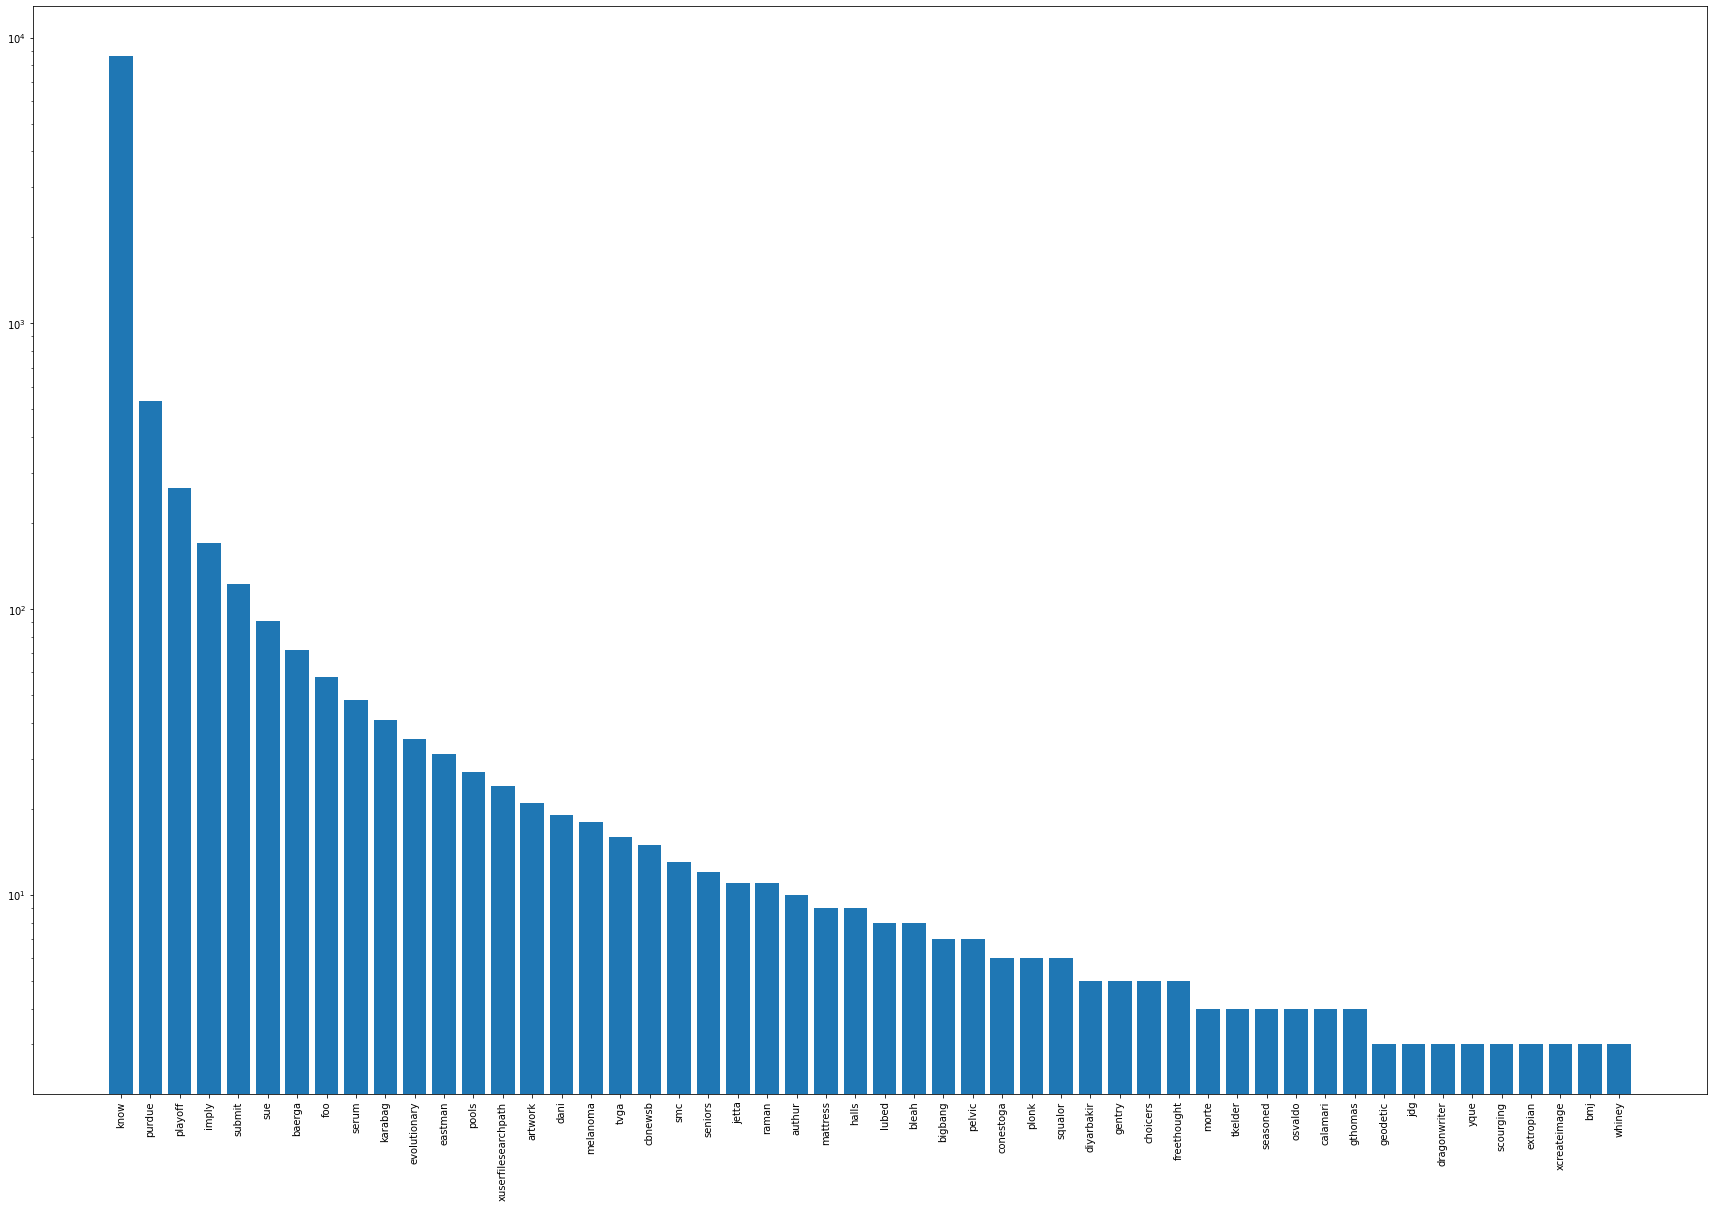

In [ ]:
import matplotlib.pyplot as plt
import matplotlib 
 
words1, amount1 = filter(words, amount)
plt.figure(figsize=(30, 20))
plt.bar(words1[::1000], amount1[::1000])
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()


__Задание 7 (2 балла):__ Для построения моделей данные нужно перевести в числовой вид. Для этого воспользуйтесь представлением "мешка слов", в котором признаками являются слова, а значениями - частоты их встречаемости в документе. Построить представление мешка слов можно с помощью класса CountVectorizer из sklearn. Подготовьте векторизатор, подав ему обучающие текстовые данные из `data` (приведите тексты к формату входа векторизатора) и полученный выше словарь.

Примените полученный векторизатор к обучающим и тестовым данным, на выходе должны получиться два numpy array (первая размерность - число объектов, вторая - число слов в словаре).

In [ ]:
def voc_unique_words(data, column_name ): 
  hist = pd.DataFrame(list(chain.from_iterable(data[str(column_name)].tolist())) ).value_counts()  
  words = list(zip(*list(chain(hist.index.values))))[0] 
  amount = hist.tolist()  
 
  return dict(zip(words, amount))

In [ ]:
def list_to_test(list_text):  
  text = ""
  for word in list_text: 
    text += word + " " 
  text = text[:-1] 
  return text 


In [ ]:
voc = voc_unique_words(data, "pp_text" )

In [ ]:
data['pp_text1'] = data['pp_text'].apply(lambda x: list_to_test(x) ) 
data

,text,is_train,label_name,pp_text,pp_text1
0,From: mathew <mathew@mantis.co.uk>\nSubject: R...,True,alt.atheism,"[from, mathew, mathew, mantis, co, uk, subject...",from mathew mathew mantis co uk subject re pol...
1,From: keith@cco.caltech.edu (Keith Allan Schne...,True,alt.atheism,"[from, keith, cco, caltech, edu, keith, allan,...",from keith cco caltech edu keith allan schneid...
2,From: a137490@lehtori.cc.tut.fi (Aario Sami)\n...,True,alt.atheism,"[from, a, lehtori, cc, tut, fi, aario, sami, s...",from a lehtori cc tut fi aario sami subject re...
3,From: chrisb@seachg.com (Chris Blask)\nSubject...,True,alt.atheism,"[from, chrisb, seachg, com, chris, blask, subj...",from chrisb seachg com chris blask subject re ...
4,From: (Rashid)\nSubject: Re: Yet more Rushdie...,True,alt.atheism,"[from, rashid, subject, re, yet, more, rushdie...",from rashid subject re yet more rushdie re isl...
...,...,...,...,...,...
18841,Subject: Re: [rw] Is Robert Weiss the only ort...,False,talk.religion.misc,"[subject, re, rw, is, robert, weiss, the, only...",subject re rw is robert weiss the only orthodo...
18842,From: daveb@pogo.wv.tek.com (Dave Butler)\nSub...,False,talk.religion.misc,"[from, daveb, pogo, wv, tek, com, dave, butler...",from daveb pogo wv tek com dave butler subject...
18843,From: pharvey@quack.kfu.com (Paul Harvey)\nSub...,False,talk.religion.misc,"[from, pharvey, quack, kfu, com, paul, harvey,...",from pharvey quack kfu com paul harvey subject...
18844,Nntp-Posting-Host: gjalp.ifi.uio.no\nFrom: joa...,False,talk.religion.misc,"[nntp, posting, host, gjalp, ifi, uio, no, fro...",nntp posting host gjalp ifi uio no from joakim...


In [ ]:
train = data[data['is_train']] 
test = data[data['is_train'] == False]  
train

,text,is_train,label_name,pp_text,pp_text1
0,From: mathew <mathew@mantis.co.uk>\nSubject: R...,True,alt.atheism,"[from, mathew, mathew, mantis, co, uk, subject...",from mathew mathew mantis co uk subject re pol...
1,From: keith@cco.caltech.edu (Keith Allan Schne...,True,alt.atheism,"[from, keith, cco, caltech, edu, keith, allan,...",from keith cco caltech edu keith allan schneid...
2,From: a137490@lehtori.cc.tut.fi (Aario Sami)\n...,True,alt.atheism,"[from, a, lehtori, cc, tut, fi, aario, sami, s...",from a lehtori cc tut fi aario sami subject re...
3,From: chrisb@seachg.com (Chris Blask)\nSubject...,True,alt.atheism,"[from, chrisb, seachg, com, chris, blask, subj...",from chrisb seachg com chris blask subject re ...
4,From: (Rashid)\nSubject: Re: Yet more Rushdie...,True,alt.atheism,"[from, rashid, subject, re, yet, more, rushdie...",from rashid subject re yet more rushdie re isl...
...,...,...,...,...,...
18590,From: system@kalki33.lakes.trenton.sc.us (Kalk...,True,talk.religion.misc,"[from, system, kalki, lakes, trenton, sc, us, ...",from system kalki lakes trenton sc us kalki da...
18591,From: clavazzi@nyx.cs.du.edu (The_Doge)\nSubje...,True,talk.religion.misc,"[from, clavazzi, nyx, cs, du, edu, the, doge, ...",from clavazzi nyx cs du edu the doge subject w...
18592,From: hudson@athena.cs.uga.edu (Paul Hudson Jr...,True,talk.religion.misc,"[from, hudson, athena, cs, uga, edu, paul, hud...",from hudson athena cs uga edu paul hudson jr s...
18593,From: jmeritt@mental.MITRE.ORG (Jim Meritt - S...,True,talk.religion.misc,"[from, jmeritt, mental, mitre, org, jim, merit...",from jmeritt mental mitre org jim meritt syste...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def task_7():
    vectorizer = CountVectorizer(vocabulary = voc.keys())
    
    train_v = vectorizer.fit_transform(train.pp_text1.values)
    test_v = vectorizer.fit_transform(test.pp_text1.values)
    
   
    
    return train_v, test_v

train_v, test_v = task_7()

__Задание 8 (2 балла):__ Модель логистической регрессии хорошо работает для простых задач классификации текстов, примените её к полученным данным. Для этого настройте модель на обучающих данных, сделайте предсказание для тестовых и измерьте качество с помощью метрик accuracy и F1-score с микро- и макро-усреднением. Попробуйте подобрать оптимальное значение коэффициента регуляризации С с помощью GridSearchCV.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

def task_8(): 
    
    grid = GridSearchCV(LogisticRegression(max_iter=100), {'C': [0.03, 0.05]}, scoring="accuracy", cv=3)
    grid.fit(train_v, train.label_name)
    
    return grid

In [ ]:
grid = task_8()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
accuracy = accuracy_score(test.label_name, grid.predict(test_v))
f1_macro = f1_score(test.label_name, grid.predict(test_v), average="macro")
f1_micro = f1_score(test.label_name, grid.predict(test_v), average="micro")
 
print("Accuracy: ", accuracy) 
print("f1_macro: ", f1_macro) 
print("f1_micro: ", f1_micro) 

Accuracy:  0.7855815188528943
f1_macro:  0.7786661987081096
f1_micro:  0.7855815188528943


In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,43.003595,0.820305,0.017639,0.000466,0.03,{'C': 0.03},0.845440,0.863697,0.850703,0.853280,0.007673,2
1,42.807171,0.403196,0.018126,0.001605,0.05,{'C': 0.05},0.853128,0.866348,0.855476,0.858318,0.005759,1


__Задание 9 (1.5 балл):__ Ошибки классификации удобно анализировать с помощью матрицы ошибок. Сделав предсказание на тесте постройте и визуализируйте эту матрицу с помощью функции plot_confusion_matrix в двух вариантах: с абсолютными и относительными (нормированными) значеними. Определите классы, которые чаще всего путаются между собой.

In [ ]:
from sklearn.metrics import plot_confusion_matrix 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC   
 
 


def task_9():
    plt.figure(figsize=(30, 30))
    plot_confusion_matrix(grid, test_v, test.label_name, 
                          normalize = None , ax=plt.gca(), 
                          xticks_rotation='vertical')  
    
    plt.figure(figsize=(30, 30))
    plot_confusion_matrix(grid, test_v, test.label_name, 
                          normalize = 'true' , ax=plt.gca(), 
                          xticks_rotation='vertical') 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


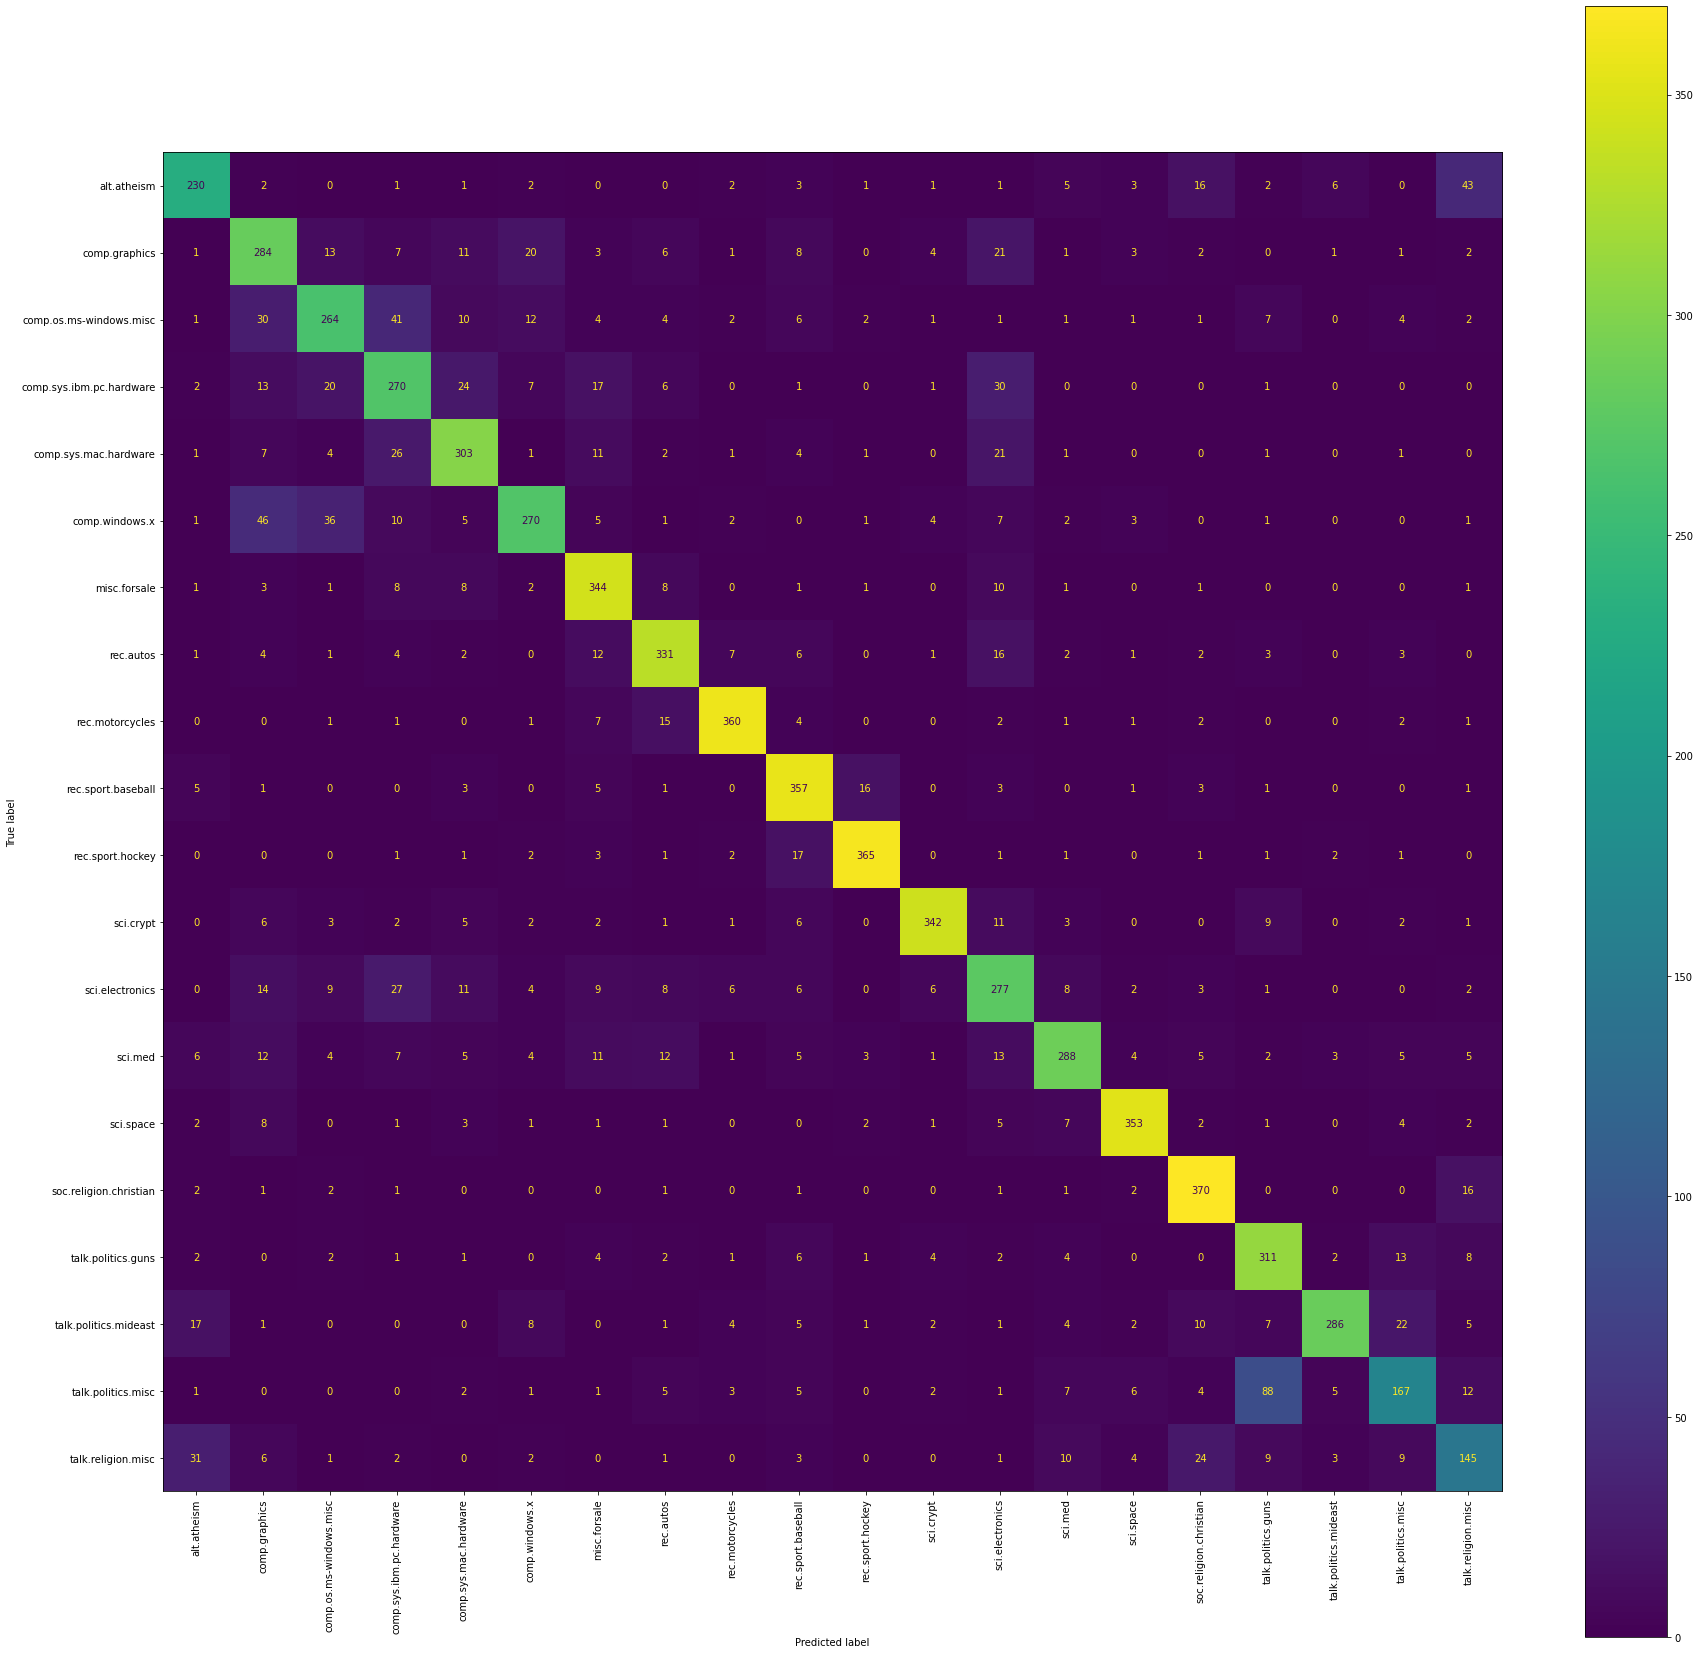

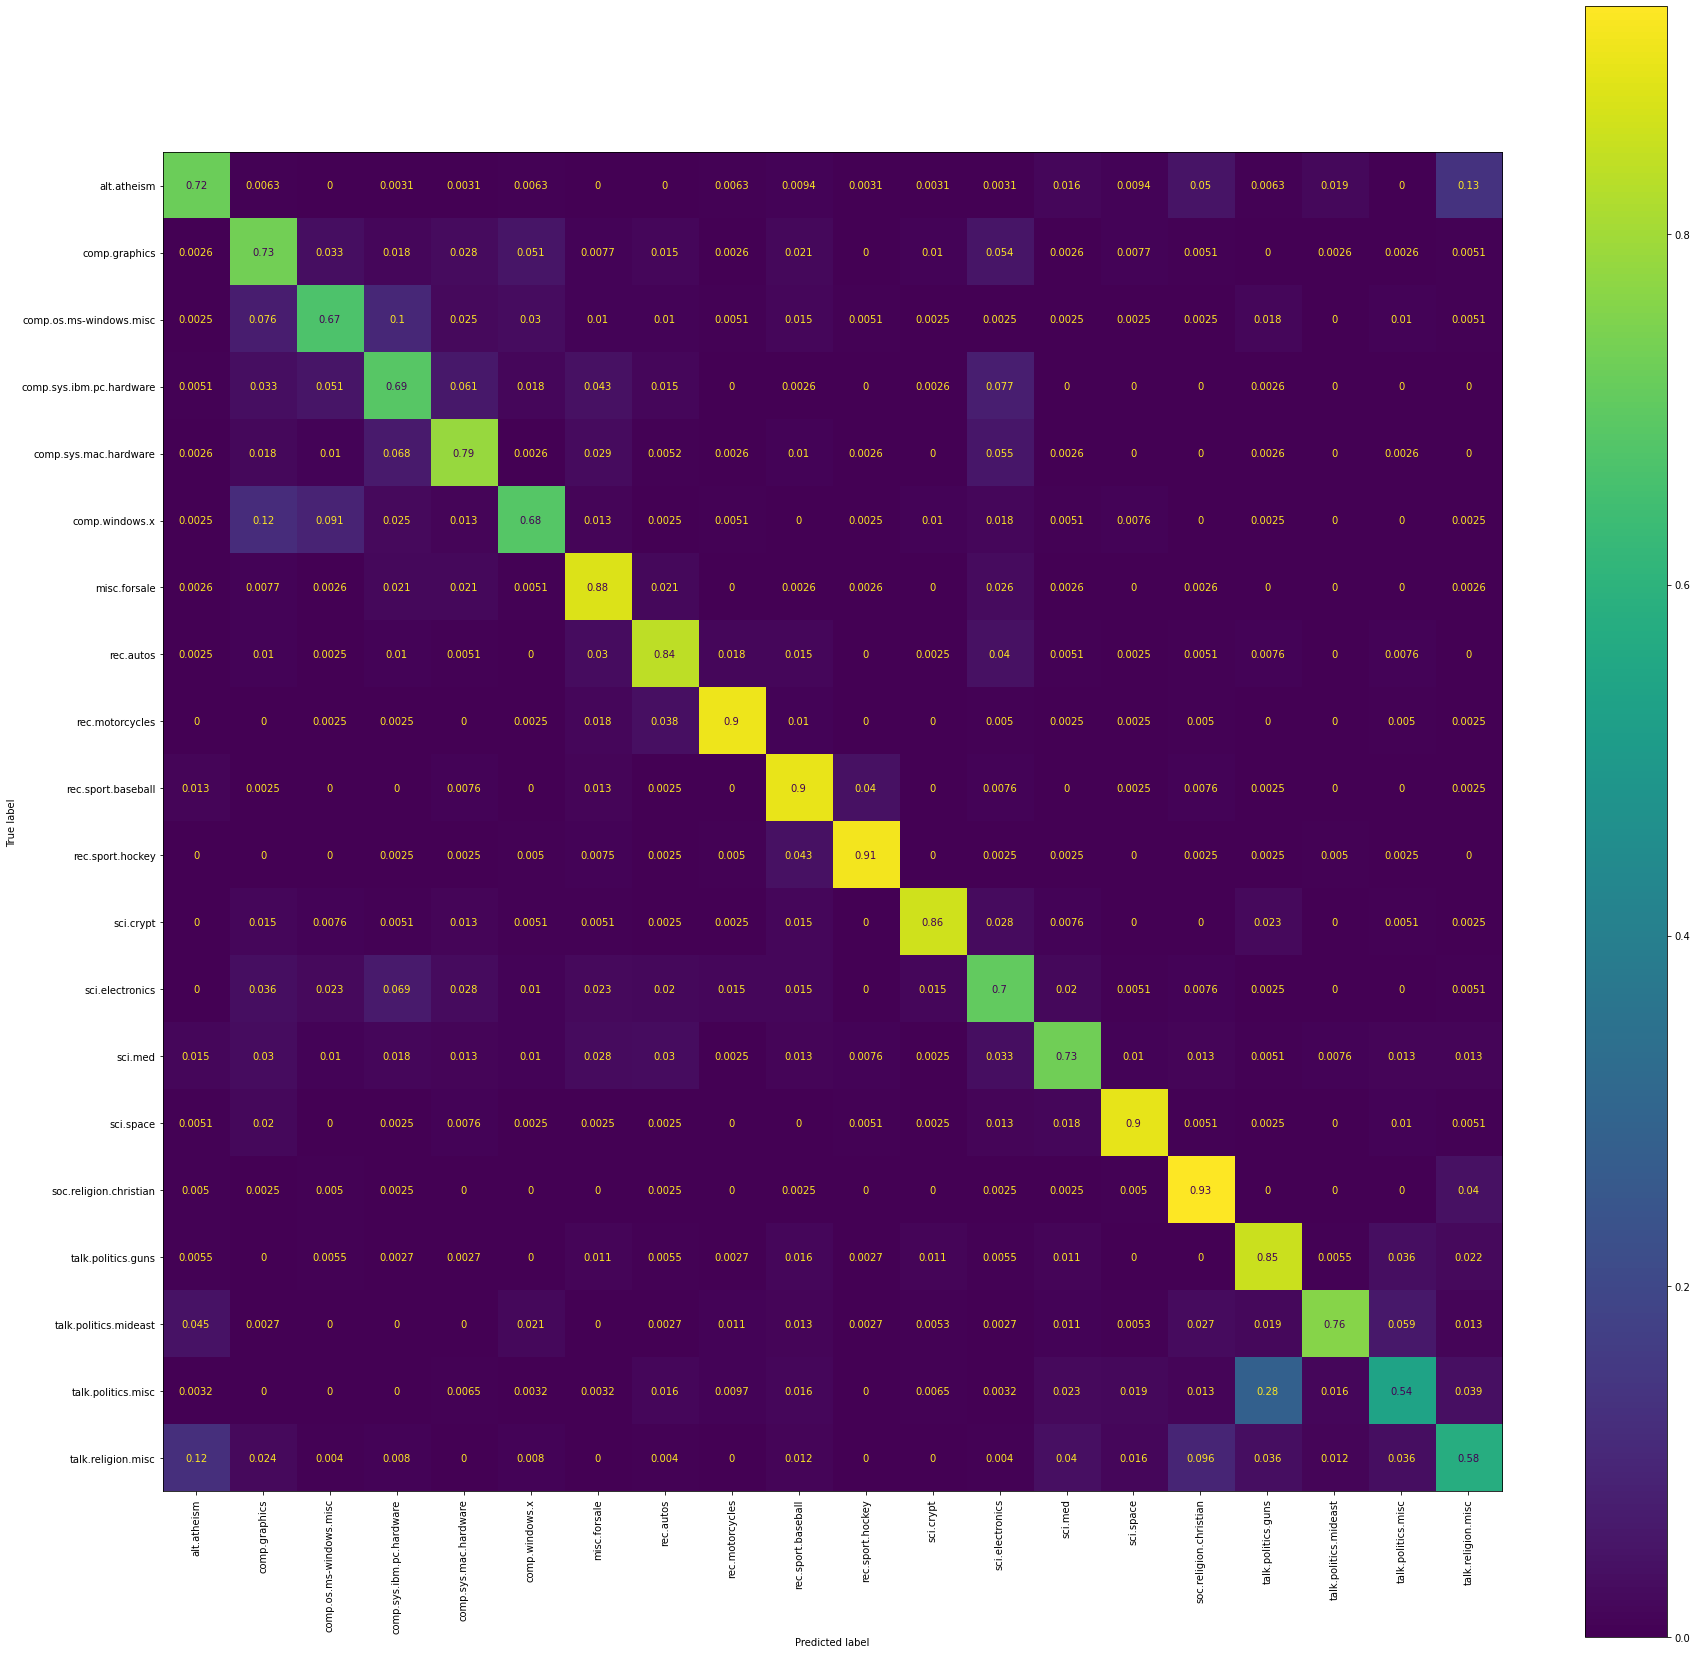

In [ ]:
task_9()

Исходя из корреляционного анализа можно сделать вывод, о том что чаще всего путают классы  talk.politics.guns и talk.politics.misc, alt.religion.misc и alt.atheism, comp.graphics с comp.windows.x

__Задание 10 (2.5 балла):__ Установите библиотеку XGBoost и обучите модель градиентного бустинга для решения поставленной задачи классификации. Попробуйте подобрать оптимальную модель, выбрав 2-3 важных параметра обучения. Укажите, какие параметры в большей, а какие - в меньшей степени оказали влияние на итоговое качество модели.

In [ ]:
from xgboost import XGBClassifier

def task_10():
    param = {'learning_rate': [0.05, 0.15], 
                  'max_depth': [3, 10],     
                  'lambda': [0.2, 0.8]}    
    
    xgb = GridSearchCV(XGBClassifier(n_estimators=200), param, scoring="accuracy", cv=3)
    xgb.fit(train_v, train.label_name)
    
    return xgb



In [ ]:
task_10()

In [ ]:
accuracy = accuracy_score(test.label_name, xgb_grid.predict(test_v))
f1_macro = f1_score(test.label_name, xgb_grid.predict(test_v), average="macro")
f1_micro = f1_score(test.label_name, xgb_grid.predict(test_v), average="micro")
 
print("Accuracy: ", accuracy) 
print("f1_macro: ", f1_macro) 
print("f1_micro: ", f1_micro) 

__Задание 11 (2.5 балла):__ Часто в обработке текстов возникает задача выделения тем, обсуждаемых в них. Одним из способов решения это задачи является кластеризация графа совстречаемостей слов. Для текстов, находящихся в поле `pp_text` постройте словарь "слово" в "слово" в "счетчик совстречаемости", для слова A и B достаточно хранить A -> B -> counter, хранить B -> A -> counter не нужно. Счетчик увеличивается на 1, если пара слов встретилась в одном тексте внутри окна с длиной 10 слов.

In [ ]:
words, amount = filter(list(chain(voc_unique_words(train, "pp_text").keys())), list(chain(voc_unique_words(train, "pp_text").values()))) 
words = words.tolist()
amount = amount.tolist()
voc = dict(zip(words, amount))
len(voc)

In [ ]:
def task_11():
    graph = dict() 
    texts = list(chain(train.pp_text.values)) 
    
    for text in texts:
        for i  in range(len(text)): 
            if text[i] not in voc:
                continue       
            words1 = text[i+1:i+1 + 20] 
            for word1 in words1: 
                if word1 not in voc:
                    continue     
                key = tuple(sorted([text[i], word1]))
                if key in graph:
                    graph[key] += 1
                else:
                    graph[key] = 1
                    
    return graph

In [ ]:
sovmeet = task_11()  
sovmeet

In [ ]:
len(sovmeet)

__Задание 12 (2.5 балла):__ Приняв каждое слово за вершину, а ребра между ними - за наличие совместной встречаемости, постройте граф совстречаемостей. Все ребра равнозначны, ребро добавляется между словами, если значение счетчика совместной встречамости этих слов выше заданного порога T. Примените к получившему графу алгоритм выделения сообществ greedy_modularity_communities из библиотеки NetworkX и напечайте получившиеся вообщества. Можно ли их как-то интерпретировать?

Пробуйте варьировать значение T от 70 до 120 и удалять слишком большие (и потому заведомо бесполезные) сообщества и сообщества из 1 слова.

In [ ]:
from networkx import Graph
from networkx.algorithms import community

def task_12(T):
    
    graph = Graph()
    graph.add_nodes_from(voc.keys())
  
    for key, value in sovmeet.items():
        if value >= T:
            graph.add_edge(key[0], key[1])
    
    communityes = community.greedy_modularity_communities(graph)
    l = [] 
    for i in communityes: 
      if len(i) >1 and len(i) <80: 
        l += [i]
    
    return l

In [ ]:
for T in range(70, 121, 10):
    print("T: ", T)
    
    communityes = task_12(T)
    print(communityes)